In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def DaskProfReader(filename):
    filename = open(filename,'r')
    timestamps=list()
    for line in filename:
        for item in line.split():
            if item.startswith('start_time'):
                timestamp1=float(item.split('=')[1].split(',')[0])
            elif item.startswith('end_time'):
                timestamp2=float(item.split('=')[1].split(',')[0])
        timestamps.append([timestamp1,timestamp2])
    
    filename.close()
    
    return np.array(timestamps)

def SchedulerDelay(profiles,measure='start'):
    delays = np.array([])
    if measure == 'end':
        index = 1
    else:
        index = 0
    for profile in profiles:
        start_times = profile[:,index]
        start_times.sort()
        start_times = start_times-start_times[0]
        delays = np.append(delays,start_times[0:-1])
        
    return delays

def SchedulerDelayDist(profiles,measure='start'):
    delays = np.array([])
    if measure == 'end':
        index = 1
    else:
        index = 0
    
    for profile in profiles:
        times = profile[1][:,index]
        times.sort()
        times = times-times[0]
        delays = np.append(delays,times)
    
    return delays

def TaskPerSecHist(array):
    exps = array.shape[0]
    temp = list()
    maxlen=0
    for i in range(0,exps):
        c =[0]
        sec =1
        for j in range(1,array.shape[1]):
            if array[i,j-1]<sec:
                c[sec-1]+=1
            else:
                sec+=1
                c.append(1)
        if len(c)> maxlen:
            maxlen=len(c)
        temp.append(c)
        
    hists = np.zeros((exps,maxlen))
    for i in range(0,exps):
        hists[i,0:len(temp[i])]=temp[i]
    
    return hists


In [3]:
# Dask Distributed Comet
Cprofiles_dist_1p_1=list()
Cprofiles_dist_2p_1=list()
Cprofiles_dist_3p_1=list()
Cprofiles_dist_4p_1=list()
Cprofiles_dist_6p_1=list()
Cprofiles_dist_8p_1=list()
Cprofiles_dist_12p_1=list()
Cprofiles_dist_24p_1=list()

Cprofiles_dist_1p_2=list()
Cprofiles_dist_2p_2=list()
Cprofiles_dist_3p_2=list()
Cprofiles_dist_4p_2=list()
Cprofiles_dist_6p_2=list()
Cprofiles_dist_8p_2=list()
Cprofiles_dist_12p_2=list()
Cprofiles_dist_24p_2=list()

Cprofiles_dist_1p_3=list()
Cprofiles_dist_2p_3=list()
Cprofiles_dist_3p_3=list()
Cprofiles_dist_4p_3=list()
Cprofiles_dist_6p_3=list()
Cprofiles_dist_8p_3=list()
Cprofiles_dist_12p_3=list()
Cprofiles_dist_24p_3=list()

Cprofiles_dist_1p_4=list()
Cprofiles_dist_2p_4=list()
Cprofiles_dist_3p_4=list()
Cprofiles_dist_4p_4=list()
Cprofiles_dist_6p_4=list()
Cprofiles_dist_8p_4=list()
Cprofiles_dist_12p_4=list()
Cprofiles_dist_24p_4=list()


for i in range(0,10):
    Cprofiles_dist_1p_1.append(np.load('Comet/1node/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_2p_1.append(np.load('Comet/1node/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_3p_1.append(np.load('Comet/1node/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_4p_1.append(np.load('Comet/1node/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_6p_1.append(np.load('Comet/1node/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_8p_1.append(np.load('Comet/1node/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_12p_1.append(np.load('Comet/1node/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_24p_1.append(np.load('Comet/1node/timings_24p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles_dist_1p_2.append(np.load('Comet/2nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_2p_2.append(np.load('Comet/2nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_3p_2.append(np.load('Comet/2nodes/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_4p_2.append(np.load('Comet/2nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_6p_2.append(np.load('Comet/2nodes/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_8p_2.append(np.load('Comet/2nodes/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_12p_2.append(np.load('Comet/2nodes/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_24p_2.append(np.load('Comet/2nodes/timings_24p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles_dist_1p_3.append(np.load('Comet/3nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_3p_3.append(np.load('Comet/3nodes/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_4p_3.append(np.load('Comet/3nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_6p_3.append(np.load('Comet/3nodes/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_8p_3.append(np.load('Comet/3nodes/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_12p_3.append(np.load('Comet/3nodes/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_24p_3.append(np.load('Comet/3nodes/timings_24p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Cprofiles_dist_1p_4.append(np.load('Comet/4nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_2p_4.append(np.load('Comet/4nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_3p_4.append(np.load('Comet/4nodes/timings_3p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_4p_4.append(np.load('Comet/4nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_6p_4.append(np.load('Comet/4nodes/timings_6p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_8p_4.append(np.load('Comet/4nodes/timings_8p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_12p_4.append(np.load('Comet/4nodes/timings_12p_%02d.npz.npy'%(i+1)))
    Cprofiles_dist_24p_4.append(np.load('Comet/4nodes/timings_24p_%02d.npz.npy'%(i+1)))


In [4]:
# Dask Distributed SuperMic
Sprofiles_dist_1p_1=list()
Sprofiles_dist_2p_1=list()
Sprofiles_dist_4p_1=list()
Sprofiles_dist_5p_1=list()
Sprofiles_dist_10p_1=list()
Sprofiles_dist_20p_1=list()

Sprofiles_dist_1p_2=list()
Sprofiles_dist_2p_2=list()
Sprofiles_dist_4p_2=list()
Sprofiles_dist_5p_2=list()
Sprofiles_dist_10p_2=list()
Sprofiles_dist_20p_2=list()

Sprofiles_dist_1p_3=list()
Sprofiles_dist_2p_3=list()
Sprofiles_dist_4p_3=list()
Sprofiles_dist_5p_3=list()
Sprofiles_dist_10p_3=list()
Sprofiles_dist_20p_3=list()

Sprofiles_dist_1p_4=list()
Sprofiles_dist_2p_4=list()
Sprofiles_dist_4p_4=list()
Sprofiles_dist_5p_4=list()
Sprofiles_dist_10p_4=list()
Sprofiles_dist_20p_4=list()


for i in range(0,10):
    Sprofiles_dist_1p_1.append(np.load('SuperMic/1node/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_1.append(np.load('SuperMic/1node/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_1.append(np.load('SuperMic/1node/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_1.append(np.load('SuperMic/1node/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_1.append(np.load('SuperMic/1node/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_1.append(np.load('SuperMic/1node/timings_20p_%02d.npz.npy'%(i+1)))
    
for i in range(0,10):
    Sprofiles_dist_1p_2.append(np.load('SuperMic/2nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_2.append(np.load('SuperMic/2nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_2.append(np.load('SuperMic/2nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_2.append(np.load('SuperMic/2nodes/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_2.append(np.load('SuperMic/2nodes/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_2.append(np.load('SuperMic/2nodes/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Sprofiles_dist_1p_3.append(np.load('SuperMic/3nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_3.append(np.load('SuperMic/3nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_3.append(np.load('SuperMic/3nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_3.append(np.load('SuperMic/3nodes/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_3.append(np.load('SuperMic/3nodes/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_3.append(np.load('SuperMic/3nodes/timings_20p_%02d.npz.npy'%(i+1)))

for i in range(0,10):
    Sprofiles_dist_1p_4.append(np.load('SuperMic/4nodes/timings_1p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_2p_4.append(np.load('SuperMic/4nodes/timings_2p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_4p_4.append(np.load('SuperMic/4nodes/timings_4p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_5p_4.append(np.load('SuperMic/4nodes/timings_5p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_10p_4.append(np.load('SuperMic/4nodes/timings_10p_%02d.npz.npy'%(i+1)))
    Sprofiles_dist_20p_4.append(np.load('SuperMic/4nodes/timings_20p_%02d.npz.npy'%(i+1)))


In [5]:
# Dask Distributed SuperMic
distDelayC_1p_1 = SchedulerDelayDist(Cprofiles_dist_1p_1,measure='end')
distDelayC_2p_1 = SchedulerDelayDist(Cprofiles_dist_2p_1,measure='end')
distDelayC_3p_1 = SchedulerDelayDist(Cprofiles_dist_3p_1,measure='end')
distDelayC_4p_1 = SchedulerDelayDist(Cprofiles_dist_4p_1,measure='end')
distDelayC_6p_1 = SchedulerDelayDist(Cprofiles_dist_6p_1,measure='end')
distDelayC_8p_1 = SchedulerDelayDist(Cprofiles_dist_8p_1,measure='end')
distDelayC_12p_1 = SchedulerDelayDist(Cprofiles_dist_12p_1,measure='end')
distDelayC_24p_1 = SchedulerDelayDist(Cprofiles_dist_24p_1,measure='end')

distDelayC_1p_1 = distDelayC_1p_1.reshape(10,100000)
distDelayC_2p_1 = distDelayC_2p_1.reshape(10,100000)
distDelayC_3p_1 = distDelayC_3p_1.reshape(10,100000)
distDelayC_4p_1 = distDelayC_4p_1.reshape(10,100000)
distDelayC_6p_1 = distDelayC_6p_1.reshape(10,100000)
distDelayC_8p_1 = distDelayC_8p_1.reshape(10,100000)
distDelayC_12p_1 = distDelayC_12p_1.reshape(10,100000)
distDelayC_24p_1 = distDelayC_24p_1.reshape(10,100000)

DistHistC_1p_1 = TaskPerSecHist(distDelayC_1p_1)
DistHistC_2p_1 = TaskPerSecHist(distDelayC_2p_1)
DistHistC_3p_1 = TaskPerSecHist(distDelayC_3p_1)
DistHistC_4p_1 = TaskPerSecHist(distDelayC_4p_1)
DistHistC_6p_1 = TaskPerSecHist(distDelayC_6p_1)
DistHistC_8p_1 = TaskPerSecHist(distDelayC_8p_1)
DistHistC_12p_1 = TaskPerSecHist(distDelayC_12p_1)
DistHistC_24p_1 = TaskPerSecHist(distDelayC_24p_1)

distDelayC_1p_2 = SchedulerDelayDist(Cprofiles_dist_1p_2,measure='end')
distDelayC_2p_2 = SchedulerDelayDist(Cprofiles_dist_2p_2,measure='end')
distDelayC_3p_2 = SchedulerDelayDist(Cprofiles_dist_3p_2,measure='end')
distDelayC_4p_2 = SchedulerDelayDist(Cprofiles_dist_4p_2,measure='end')
distDelayC_6p_2 = SchedulerDelayDist(Cprofiles_dist_6p_2,measure='end')
distDelayC_8p_2 = SchedulerDelayDist(Cprofiles_dist_8p_2,measure='end')
distDelayC_12p_2 = SchedulerDelayDist(Cprofiles_dist_12p_2,measure='end')
distDelayC_24p_2 = SchedulerDelayDist(Cprofiles_dist_24p_2,measure='end')

distDelayC_1p_2 = distDelayC_1p_2.reshape(10,100000)
distDelayC_2p_2 = distDelayC_2p_2.reshape(10,100000)
distDelayC_3p_2 = distDelayC_3p_2.reshape(10,100000)
distDelayC_4p_2 = distDelayC_4p_2.reshape(10,100000)
distDelayC_6p_2 = distDelayC_6p_2.reshape(10,100000)
distDelayC_8p_2 = distDelayC_8p_2.reshape(10,100000)
distDelayC_12p_2 = distDelayC_12p_2.reshape(10,100000)
distDelayC_24p_2 = distDelayC_24p_2.reshape(10,100000)

DistHistC_1p_2 = TaskPerSecHist(distDelayC_1p_2)
DistHistC_2p_2 = TaskPerSecHist(distDelayC_2p_2)
DistHistC_3p_2 = TaskPerSecHist(distDelayC_3p_2)
DistHistC_4p_2 = TaskPerSecHist(distDelayC_4p_2)
DistHistC_6p_2 = TaskPerSecHist(distDelayC_6p_2)
DistHistC_8p_2 = TaskPerSecHist(distDelayC_8p_2)
DistHistC_12p_2 = TaskPerSecHist(distDelayC_12p_2)
DistHistC_24p_2 = TaskPerSecHist(distDelayC_24p_2)

distDelayC_1p_3 = SchedulerDelayDist(Cprofiles_dist_1p_3,measure='end')
distDelayC_3p_3 = SchedulerDelayDist(Cprofiles_dist_3p_3,measure='end')
distDelayC_4p_3 = SchedulerDelayDist(Cprofiles_dist_4p_3,measure='end')
distDelayC_6p_3 = SchedulerDelayDist(Cprofiles_dist_6p_3,measure='end')
distDelayC_8p_3 = SchedulerDelayDist(Cprofiles_dist_8p_3,measure='end')
distDelayC_12p_3 = SchedulerDelayDist(Cprofiles_dist_12p_3,measure='end')
distDelayC_24p_3 = SchedulerDelayDist(Cprofiles_dist_24p_3,measure='end')

distDelayC_1p_3 = distDelayC_1p_3.reshape(10,100000)
distDelayC_3p_3 = distDelayC_3p_3.reshape(10,100000)
distDelayC_4p_3 = distDelayC_4p_3.reshape(10,100000)
distDelayC_6p_3 = distDelayC_6p_3.reshape(10,100000)
distDelayC_8p_3 = distDelayC_8p_3.reshape(10,100000)
distDelayC_12p_3 = distDelayC_12p_3.reshape(10,100000)
distDelayC_24p_3 = distDelayC_24p_3.reshape(10,100000)

DistHistC_1p_3 = TaskPerSecHist(distDelayC_1p_3)
DistHistC_3p_3 = TaskPerSecHist(distDelayC_3p_3)
DistHistC_4p_3 = TaskPerSecHist(distDelayC_4p_3)
DistHistC_6p_3 = TaskPerSecHist(distDelayC_6p_3)
DistHistC_8p_3 = TaskPerSecHist(distDelayC_8p_3)
DistHistC_12p_3 = TaskPerSecHist(distDelayC_12p_3)
DistHistC_24p_3 = TaskPerSecHist(distDelayC_24p_3)

distDelayC_1p_4 = SchedulerDelayDist(Cprofiles_dist_1p_4,measure='end')
distDelayC_2p_4 = SchedulerDelayDist(Cprofiles_dist_2p_4,measure='end')
distDelayC_3p_4 = SchedulerDelayDist(Cprofiles_dist_3p_4,measure='end')
distDelayC_4p_4 = SchedulerDelayDist(Cprofiles_dist_4p_4,measure='end')
distDelayC_6p_4 = SchedulerDelayDist(Cprofiles_dist_6p_4,measure='end')
distDelayC_8p_4 = SchedulerDelayDist(Cprofiles_dist_8p_4,measure='end')
distDelayC_12p_4 = SchedulerDelayDist(Cprofiles_dist_12p_4,measure='end')
distDelayC_24p_4 = SchedulerDelayDist(Cprofiles_dist_24p_4,measure='end')

distDelayC_1p_4 = distDelayC_1p_4.reshape(10,100000)
distDelayC_2p_4 = distDelayC_2p_4.reshape(10,100000)
distDelayC_3p_4 = distDelayC_3p_4.reshape(10,100000)
distDelayC_4p_4 = distDelayC_4p_4.reshape(10,100000)
distDelayC_6p_4 = distDelayC_6p_4.reshape(10,100000)
distDelayC_8p_4 = distDelayC_8p_4.reshape(10,100000)
distDelayC_12p_4 = distDelayC_12p_4.reshape(10,100000)
distDelayC_24p_4 = distDelayC_24p_4.reshape(10,100000)

DistHistC_1p_4 = TaskPerSecHist(distDelayC_1p_4)
DistHistC_2p_4 = TaskPerSecHist(distDelayC_2p_4)
DistHistC_3p_4 = TaskPerSecHist(distDelayC_3p_4)
DistHistC_4p_4 = TaskPerSecHist(distDelayC_4p_4)
DistHistC_6p_4 = TaskPerSecHist(distDelayC_6p_4)
DistHistC_8p_4 = TaskPerSecHist(distDelayC_8p_4)
DistHistC_12p_4 = TaskPerSecHist(distDelayC_12p_4)
DistHistC_24p_4 = TaskPerSecHist(distDelayC_24p_4)


In [6]:
# Dask Distributed SuperMic
distDelayS_1p_1 = SchedulerDelayDist(Sprofiles_dist_1p_1,measure='end')
distDelayS_2p_1 = SchedulerDelayDist(Sprofiles_dist_2p_1,measure='end')
distDelayS_4p_1 = SchedulerDelayDist(Sprofiles_dist_4p_1,measure='end')
distDelayS_5p_1 = SchedulerDelayDist(Sprofiles_dist_5p_1,measure='end')
distDelayS_10p_1 = SchedulerDelayDist(Sprofiles_dist_10p_1,measure='end')
distDelayS_20p_1 = SchedulerDelayDist(Sprofiles_dist_20p_1,measure='end')

distDelayS_1p_1 = distDelayS_1p_1.reshape(10,100000)
distDelayS_2p_1 = distDelayS_2p_1.reshape(10,100000)
distDelayS_4p_1 = distDelayS_4p_1.reshape(10,100000)
distDelayS_5p_1 = distDelayS_5p_1.reshape(10,100000)
distDelayS_10p_1 = distDelayS_10p_1.reshape(10,100000)
distDelayS_20p_1 = distDelayS_20p_1.reshape(10,100000)

DistHistS_1p_1 = TaskPerSecHist(distDelayS_1p_1)
DistHistS_2p_1 = TaskPerSecHist(distDelayS_2p_1)
DistHistS_4p_1 = TaskPerSecHist(distDelayS_4p_1)
DistHistS_5p_1 = TaskPerSecHist(distDelayS_5p_1)
DistHistS_10p_1 = TaskPerSecHist(distDelayS_10p_1)
DistHistS_20p_1 = TaskPerSecHist(distDelayS_20p_1)

distDelayS_1p_2 = SchedulerDelayDist(Sprofiles_dist_1p_2,measure='end')
distDelayS_2p_2 = SchedulerDelayDist(Sprofiles_dist_2p_2,measure='end')
distDelayS_4p_2 = SchedulerDelayDist(Sprofiles_dist_4p_2,measure='end')
distDelayS_5p_2 = SchedulerDelayDist(Sprofiles_dist_5p_2,measure='end')
distDelayS_10p_2 = SchedulerDelayDist(Sprofiles_dist_10p_2,measure='end')
distDelayS_20p_2 = SchedulerDelayDist(Sprofiles_dist_20p_2,measure='end')

distDelayS_1p_2 = distDelayS_1p_2.reshape(10,100000)
distDelayS_2p_2 = distDelayS_2p_2.reshape(10,100000)
distDelayS_4p_2 = distDelayS_4p_2.reshape(10,100000)
distDelayS_5p_2 = distDelayS_5p_2.reshape(10,100000)
distDelayS_10p_2 = distDelayS_10p_2.reshape(10,100000)
distDelayS_20p_2 = distDelayS_20p_2.reshape(10,100000)

DistHistS_1p_2 = TaskPerSecHist(distDelayS_1p_2)
DistHistS_2p_2 = TaskPerSecHist(distDelayS_2p_2)
DistHistS_4p_2 = TaskPerSecHist(distDelayS_4p_2)
DistHistS_5p_2 = TaskPerSecHist(distDelayS_5p_2)
DistHistS_10p_2 = TaskPerSecHist(distDelayS_10p_2)
DistHistS_20p_2 = TaskPerSecHist(distDelayS_20p_2)

distDelayS_1p_3 = SchedulerDelayDist(Sprofiles_dist_1p_3,measure='end')
distDelayS_2p_3 = SchedulerDelayDist(Sprofiles_dist_2p_3,measure='end')
distDelayS_4p_3 = SchedulerDelayDist(Sprofiles_dist_4p_3,measure='end')
distDelayS_5p_3 = SchedulerDelayDist(Sprofiles_dist_5p_3,measure='end')
distDelayS_10p_3 = SchedulerDelayDist(Sprofiles_dist_10p_3,measure='end')
distDelayS_20p_3 = SchedulerDelayDist(Sprofiles_dist_20p_3,measure='end')

distDelayS_1p_3 = distDelayS_1p_3.reshape(10,100000)
distDelayS_2p_3 = distDelayS_2p_3.reshape(10,100000)
distDelayS_4p_3 = distDelayS_4p_3.reshape(10,100000)
distDelayS_5p_3 = distDelayS_5p_3.reshape(10,100000)
distDelayS_10p_3 = distDelayS_10p_3.reshape(10,100000)
distDelayS_20p_3 = distDelayS_20p_3.reshape(10,100000)

DistHistS_1p_3 = TaskPerSecHist(distDelayS_1p_3)
DistHistS_2p_3 = TaskPerSecHist(distDelayS_2p_3)
DistHistS_4p_3 = TaskPerSecHist(distDelayS_4p_3)
DistHistS_5p_3 = TaskPerSecHist(distDelayS_5p_3)
DistHistS_10p_3 = TaskPerSecHist(distDelayS_10p_3)
DistHistS_20p_3 = TaskPerSecHist(distDelayS_20p_3)

distDelayS_1p_4 = SchedulerDelayDist(Sprofiles_dist_1p_4,measure='end')
distDelayS_2p_4 = SchedulerDelayDist(Sprofiles_dist_2p_4,measure='end')
distDelayS_4p_4 = SchedulerDelayDist(Sprofiles_dist_4p_4,measure='end')
distDelayS_5p_4 = SchedulerDelayDist(Sprofiles_dist_5p_4,measure='end')
distDelayS_10p_4 = SchedulerDelayDist(Sprofiles_dist_10p_4,measure='end')
distDelayS_20p_4 = SchedulerDelayDist(Sprofiles_dist_20p_4,measure='end')

distDelayS_1p_4 = distDelayS_1p_4.reshape(10,100000)
distDelayS_2p_4 = distDelayS_2p_4.reshape(10,100000)
distDelayS_4p_4 = distDelayS_4p_4.reshape(10,100000)
distDelayS_5p_4 = distDelayS_5p_4.reshape(10,100000)
distDelayS_10p_4 = distDelayS_10p_4.reshape(10,100000)
distDelayS_20p_4 = distDelayS_20p_4.reshape(10,100000)

DistHistS_1p_4 = TaskPerSecHist(distDelayS_1p_4)
DistHistS_2p_4 = TaskPerSecHist(distDelayS_2p_4)
DistHistS_4p_4 = TaskPerSecHist(distDelayS_4p_4)
DistHistS_5p_4 = TaskPerSecHist(distDelayS_5p_4)
DistHistS_10p_4 = TaskPerSecHist(distDelayS_10p_4)
DistHistS_20p_4 = TaskPerSecHist(distDelayS_20p_4)

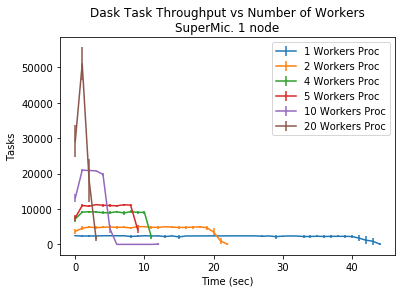

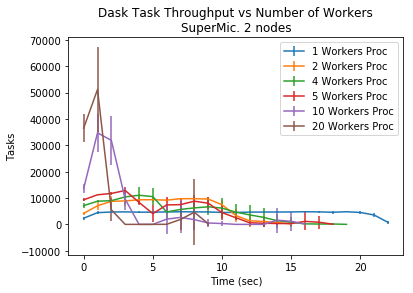

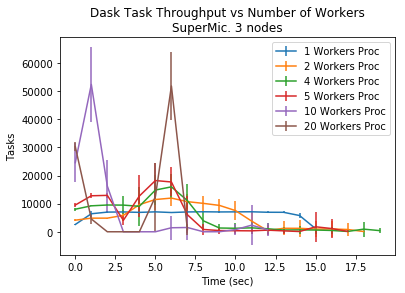

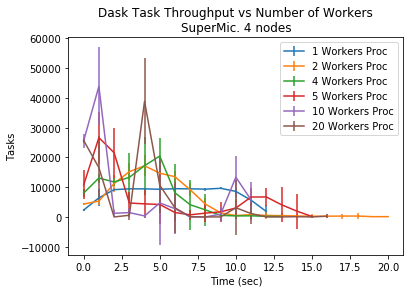

In [7]:
plt.figure()
plt.errorbar(range(0,DistHistS_1p_1.shape[1]),DistHistS_1p_1.mean(0),yerr=DistHistS_1p_1.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_1.shape[1]),DistHistS_2p_1.mean(0),yerr=DistHistS_2p_1.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_1.shape[1]),DistHistS_4p_1.mean(0),yerr=DistHistS_4p_1.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_1.shape[1]),DistHistS_5p_1.mean(0),yerr=DistHistS_5p_1.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_1.shape[1]),DistHistS_10p_1.mean(0),yerr=DistHistS_10p_1.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_1.shape[1]),DistHistS_20p_1.mean(0),yerr=DistHistS_20p_1.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 1 node')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

plt.figure()
plt.errorbar(range(0,DistHistS_1p_2.shape[1]),DistHistS_1p_2.mean(0),yerr=DistHistS_1p_2.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_2.shape[1]),DistHistS_2p_2.mean(0),yerr=DistHistS_2p_2.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_2.shape[1]),DistHistS_4p_2.mean(0),yerr=DistHistS_4p_2.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_2.shape[1]),DistHistS_5p_2.mean(0),yerr=DistHistS_5p_2.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_2.shape[1]),DistHistS_10p_2.mean(0),yerr=DistHistS_10p_2.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_2.shape[1]),DistHistS_20p_2.mean(0),yerr=DistHistS_20p_2.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 2 nodes')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed SuperMic
plt.figure()
plt.errorbar(range(0,DistHistS_1p_3.shape[1]),DistHistS_1p_3.mean(0),yerr=DistHistS_1p_3.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_3.shape[1]),DistHistS_2p_3.mean(0),yerr=DistHistS_2p_3.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_3.shape[1]),DistHistS_4p_3.mean(0),yerr=DistHistS_4p_3.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_3.shape[1]),DistHistS_5p_3.mean(0),yerr=DistHistS_5p_3.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_3.shape[1]),DistHistS_10p_3.mean(0),yerr=DistHistS_10p_3.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_3.shape[1]),DistHistS_20p_3.mean(0),yerr=DistHistS_20p_3.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 3 nodes')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()

# Dask Distributed SuperMic
plt.figure()
plt.errorbar(range(0,DistHistS_1p_4.shape[1]),DistHistS_1p_4.mean(0),yerr=DistHistS_1p_4.std(0),label='1 Workers Proc')
plt.errorbar(range(0,DistHistS_2p_4.shape[1]),DistHistS_2p_4.mean(0),yerr=DistHistS_2p_4.std(0),label='2 Workers Proc')
plt.errorbar(range(0,DistHistS_4p_4.shape[1]),DistHistS_4p_4.mean(0),yerr=DistHistS_4p_4.std(0),label='4 Workers Proc')
plt.errorbar(range(0,DistHistS_5p_4.shape[1]),DistHistS_5p_4.mean(0),yerr=DistHistS_5p_4.std(0),label='5 Workers Proc')
plt.errorbar(range(0,DistHistS_10p_4.shape[1]),DistHistS_10p_4.mean(0),yerr=DistHistS_10p_4.std(0),label='10 Workers Proc')
plt.errorbar(range(0,DistHistS_20p_4.shape[1]),DistHistS_20p_4.mean(0),yerr=DistHistS_20p_4.std(0),label='20 Workers Proc')
plt.title('Dask Task Throughput vs Number of Workers\nSuperMic. 4 nodes')
plt.xlabel('Time (sec)')
plt.ylabel('Tasks')
plt.legend()